# Working With Pandas And Matplotlib

This problem gives you an intro to doing Data Analysis with Pandas. The question is kept sligtly open ended on in the sense that we have not provided the exact steps you should take to arrive at the answers on purpose. You can refer to the tutorial provided to you earlier for inspiration. You should arrive at all the answers by writing appropriate code, eye-balling the data and reporting answers is not allowed. 

You are given [2011 Census Data](./NDAP_REPORT_6000.csv). Your task is to clean the data and perform the perform the following tasks:

---

## Task 1

1. Show how literacy rate for males, females, and the total population differs between urban and rural areas within each state.
2. Which state has the highest disparity between urban and rural areas?
3. Also plot 2 graphs for male and female population showing combined literacy rates for each state

## Task 2

1. What is the distribution of the working population (main and marginal workers) by sector (cultivators, agricultural labourers, household industry, other workers) and gender across different states?
2. Plot a graph showing all these sectors together for top 5 states ranked by employment rate.
<br>
<br>
---

You can also plot other graphs if needed or carry out other data analysis.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data.columns

Index(['ROWID', 'Country', 'State lgd code', 'State', 'District lgd code',
       'District', 'Sub-District lgd Code', 'Sub-District',
       'ULB_RLB_Village lgd Code', 'ULB_RLB_Village', 'Rural or Urban',
       'Households', 'Population', 'Male population', 'Female population',
       'Population in the age group 0 to 6 years',
       'Male Population in the age group 0 to 6 years',
       'Female Population in the age group 0 to 6 years',
       'Scheduled Caste population', 'Male Scheduled Caste population',
       'Female Scheduled Caste population ', 'Scheduled Tribe population',
       'Male Scheduled Tribe population', 'Female Scheduled Tribe population ',
       'Literate population ', 'Male literate population',
       'Female literate population ', 'Illiterate population',
       'Male illiterate population ', 'Female illiterate population ',
       'Working population', 'Male working population',
       'Female Woking population', 'Number of main workers',
       'Number o

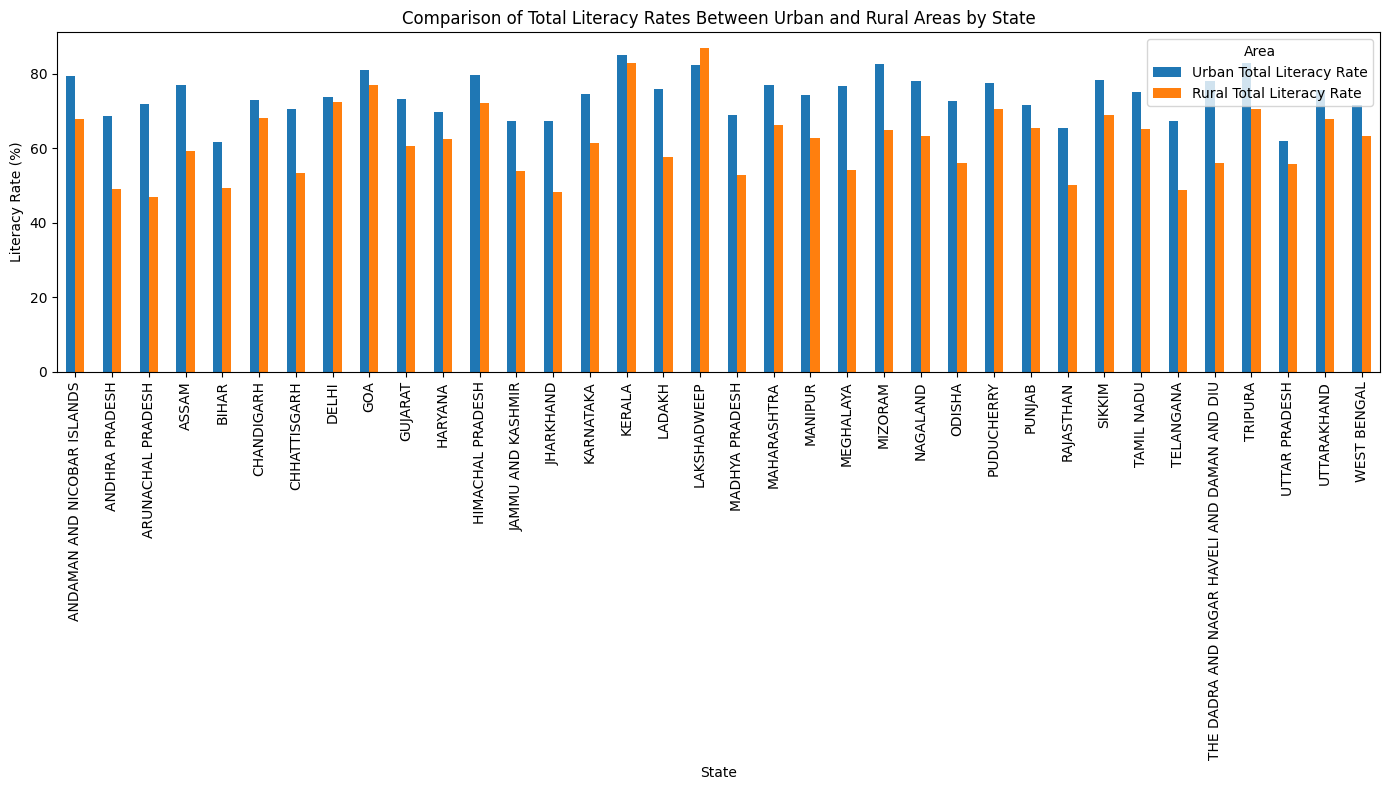

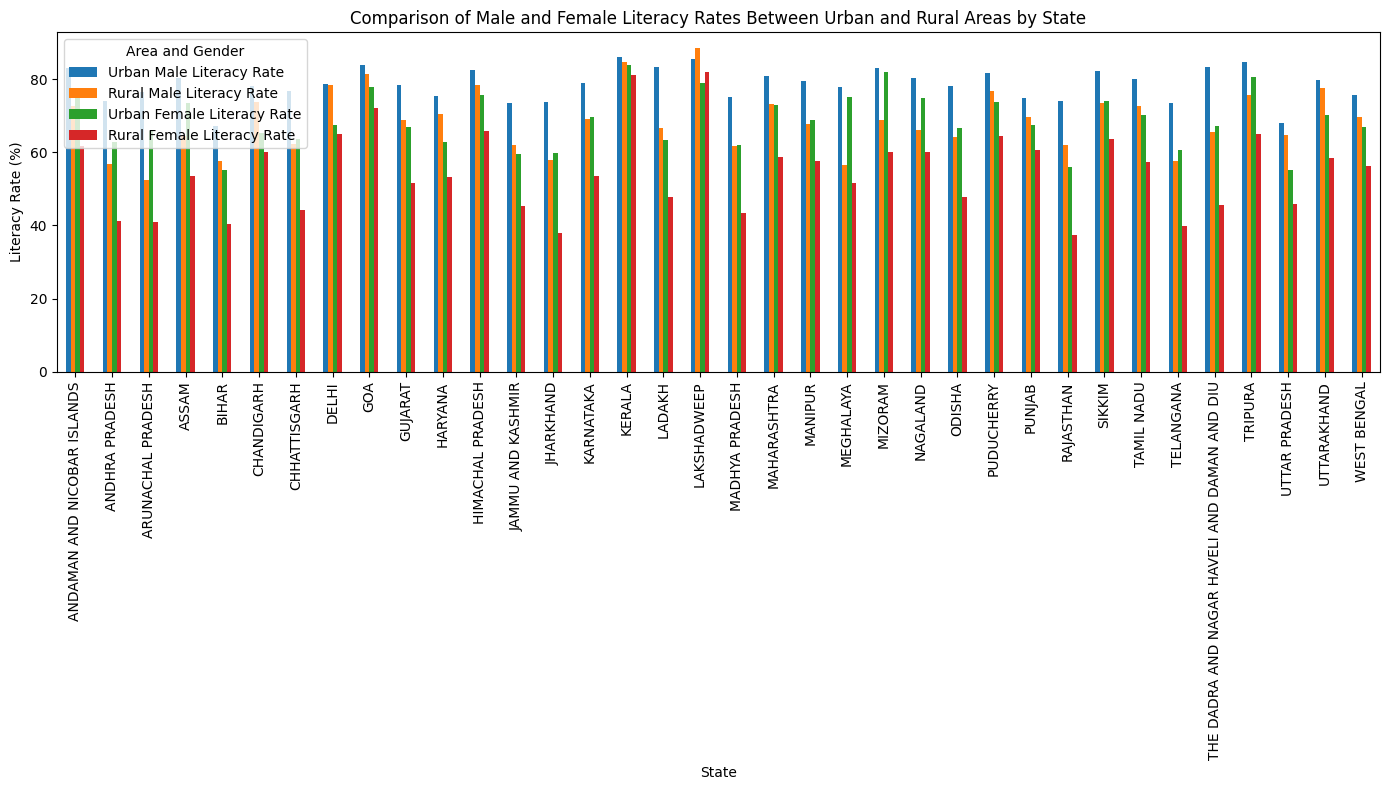

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('NDAP_REPORT_6000.csv')

df['Total Literacy Rate'] = (df['Literate population '] / df['Population']) * 100
df['Male Literacy Rate'] = (df['Male literate population'] / df['Male population']) * 100
df['Female Literacy Rate'] = (df['Female literate population '] / df['Female population']) * 100

urban_data = df[df['Rural or Urban'] == 'Urban']
rural_data = df[df['Rural or Urban'] == 'Rural']

urban_literacy = urban_data.groupby('State')[['Total Literacy Rate', 'Male Literacy Rate', 'Female Literacy Rate']].mean()
rural_literacy = rural_data.groupby('State')[['Total Literacy Rate', 'Male Literacy Rate', 'Female Literacy Rate']].mean()

literacy_comparison = urban_literacy.rename(columns=lambda x: 'Urban ' + x).merge(
    rural_literacy.rename(columns=lambda x: 'Rural ' + x),
    left_index=True,
    right_index=True
)
literacy_comparison[['Urban Total Literacy Rate', 'Rural Total Literacy Rate']].plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Total Literacy Rates Between Urban and Rural Areas by State')
plt.xlabel('State')
plt.ylabel('Literacy Rate (%)')
plt.xticks(rotation=90)
plt.legend(title='Area')
plt.tight_layout()
plt.show()

literacy_comparison[['Urban Male Literacy Rate', 'Rural Male Literacy Rate',
                     'Urban Female Literacy Rate', 'Rural Female Literacy Rate']].plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Male and Female Literacy Rates Between Urban and Rural Areas by State')
plt.xlabel('State')
plt.ylabel('Literacy Rate (%)')
plt.xticks(rotation=90)
plt.legend(title='Area and Gender')
plt.tight_layout()
plt.show()


In [ ]:
literacy_comparison['Total Literacy Rate Disparity'] = abs(
    literacy_comparison['Urban Total Literacy Rate'] - literacy_comparison['Rural Total Literacy Rate']
)
literacy_comparison['Male Literacy Rate Disparity'] = abs(
    literacy_comparison['Urban Male Literacy Rate'] - literacy_comparison['Rural Male Literacy Rate']
)
literacy_comparison['Female Literacy Rate Disparity'] = abs(
    literacy_comparison['Urban Female Literacy Rate'] - literacy_comparison['Rural Female Literacy Rate']
)

highest_disparity_state = literacy_comparison['Total Literacy Rate Disparity'].idxmax()
highest_disparity_value = literacy_comparison['Total Literacy Rate Disparity'].max()

print(f"State with the highest disparity: {highest_disparity_state}")
print(f"Highest disparity in Total Literacy Rate: {highest_disparity_value:.2f}")


State with the highest disparity: ARUNACHAL PRADESH
Highest disparity in Total Literacy Rate: 24.92


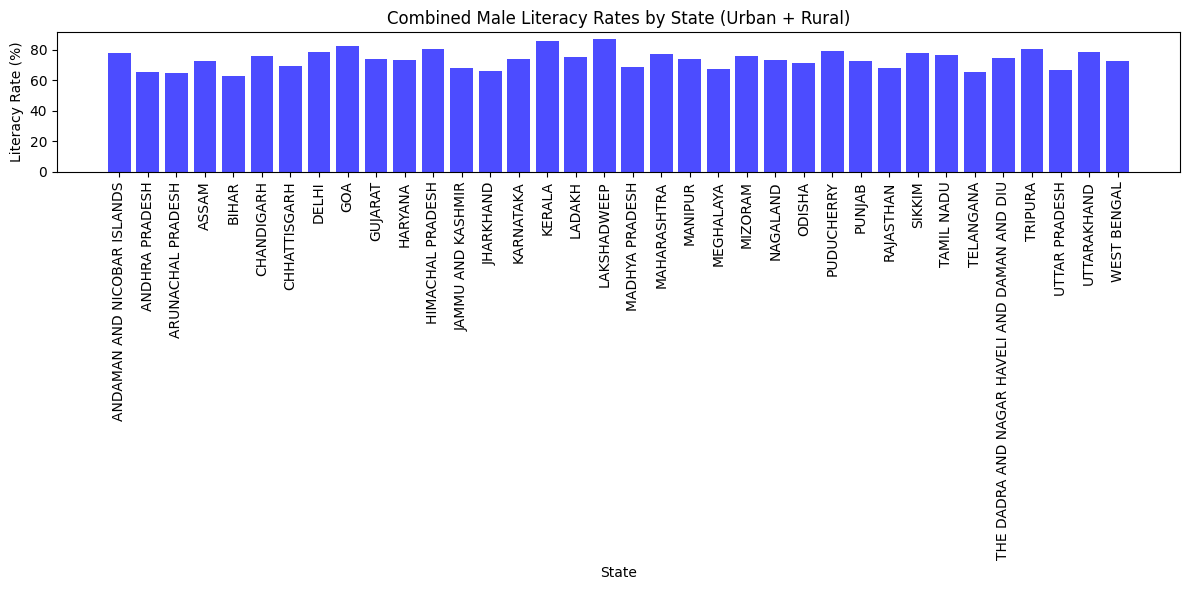

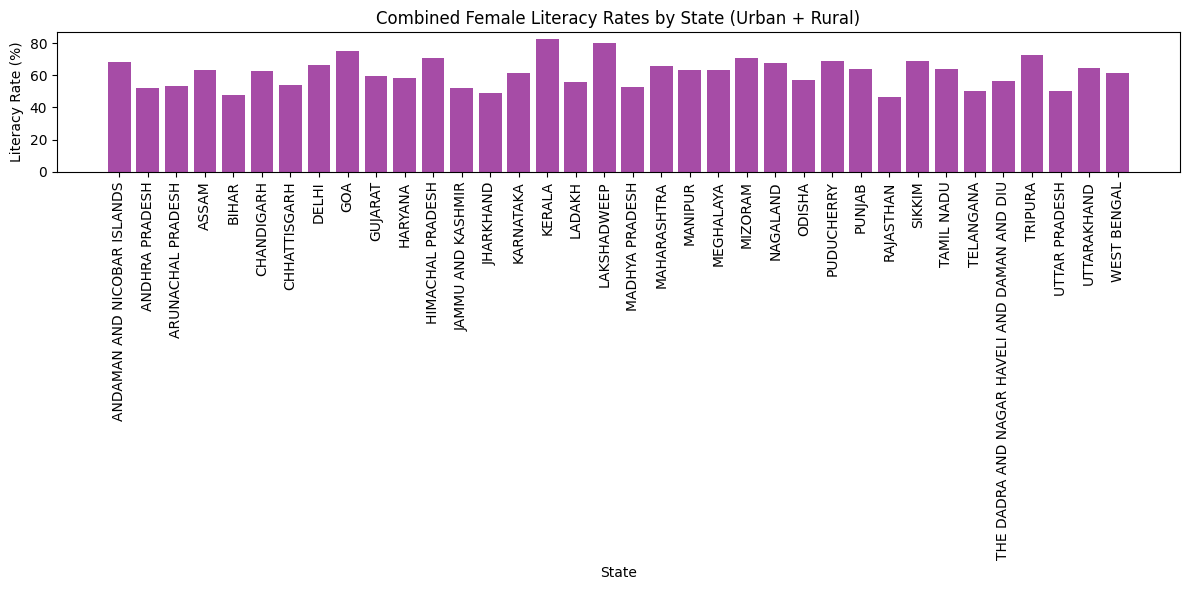

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

literacy_comparison['Combined Male Literacy Rate'] = (
    literacy_comparison['Urban Male Literacy Rate'] + literacy_comparison['Rural Male Literacy Rate']
) / 2
literacy_comparison['Combined Female Literacy Rate'] = (
    literacy_comparison['Urban Female Literacy Rate'] + literacy_comparison['Rural Female Literacy Rate']
) / 2

plt.figure(figsize=(12, 6))
plt.bar(literacy_comparison.index, literacy_comparison['Combined Male Literacy Rate'], color='blue', alpha=0.7)
plt.title('Combined Male Literacy Rates by State (Urban + Rural)')
plt.xlabel('State')
plt.ylabel('Literacy Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(literacy_comparison.index, literacy_comparison['Combined Female Literacy Rate'], color='purple', alpha=0.7)
plt.title('Combined Female Literacy Rates by State (Urban + Rural)')
plt.xlabel('State')
plt.ylabel('Literacy Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('NDAP_REPORT_6000.csv')
columns_of_interest = [
    'State',
    'Number of male main workers as cultivators',
    'Number of female main workers as cultivators',
    'Number of male main workers as agricultural labourers',
    'Number of female main workers as agricultural labourers',
    'Number of male main workers in the household industry',
    'Number of female main workers in the household industry',
    'Number of male main workers as Other workers',
    'Number of female main workers as Other workers',
    'Number of male marginal workers as cultivators',
    'Number of female marginal workers as cultivators',
    'Number of male marginal workers as agricultural labourers',
    'Number of female marginal workers as agricultural labourers',
    'Number of male marginal workers in the household industry',
    'Number of female marginal workers in the household industry',
    'Number of male marginal workers as Other workers',
    'Number of female marginal workers as Other workers'
]
df_subset = df[columns_of_interest]
df_subset['Total Male Cultivators'] = df_subset['Number of male main workers as cultivators'] + df_subset['Number of male marginal workers as cultivators']
df_subset['Total Female Cultivators'] = df_subset['Number of female main workers as cultivators'] + df_subset['Number of female marginal workers as cultivators']

df_subset['Total Male Agricultural Labourers'] = df_subset['Number of male main workers as agricultural labourers'] + df_subset['Number of male marginal workers as agricultural labourers']
df_subset['Total Female Agricultural Labourers'] = df_subset['Number of female main workers as agricultural labourers'] + df_subset['Number of female marginal workers as agricultural labourers']

df_subset['Total Male Household Industry'] = df_subset['Number of male main workers in the household industry'] + df_subset['Number of male marginal workers in the household industry']
df_subset['Total Female Household Industry'] = df_subset['Number of female main workers in the household industry'] + df_subset['Number of female marginal workers in the household industry']

df_subset['Total Male Other Workers'] = df_subset['Number of male main workers as Other workers'] + df_subset['Number of male marginal workers as Other workers']
df_subset['Total Female Other Workers'] = df_subset['Number of female main workers as Other workers'] + df_subset['Number of female marginal workers as Other workers']



df_plot = df_subset[['State', 'Total Male Cultivators', 'Total Female Cultivators',
                     'Total Male Agricultural Labourers', 'Total Female Agricultural Labourers',
                     'Total Male Household Industry', 'Total Female Household Industry',
                     'Total Male Other Workers', 'Total Female Other Workers']]
df_plot.set_index('State', inplace=True)


df_plot.plot(kind='bar', stacked=True, figsize=(12, 8))


plt.title('Distribution of Main and Marginal Workers by Sector and Gender Across States')
plt.xlabel('State')
plt.ylabel('Number of Workers')
plt.xticks(rotation=90)
plt.legend(title='Sector and Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





C:\Users\hp\AppData\Local\Temp\ipykernel_10284\1027772896.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Total Male Cultivators'] = df_subset['Number of male main workers as cultivators'] + df_subset['Number of male marginal workers as cultivators']
C:\Users\hp\AppData\Local\Temp\ipykernel_10284\1027772896.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Total Female Cultivators'] = df_subset['Number of female main workers as cultivators'] + df_subset['Number of female margin

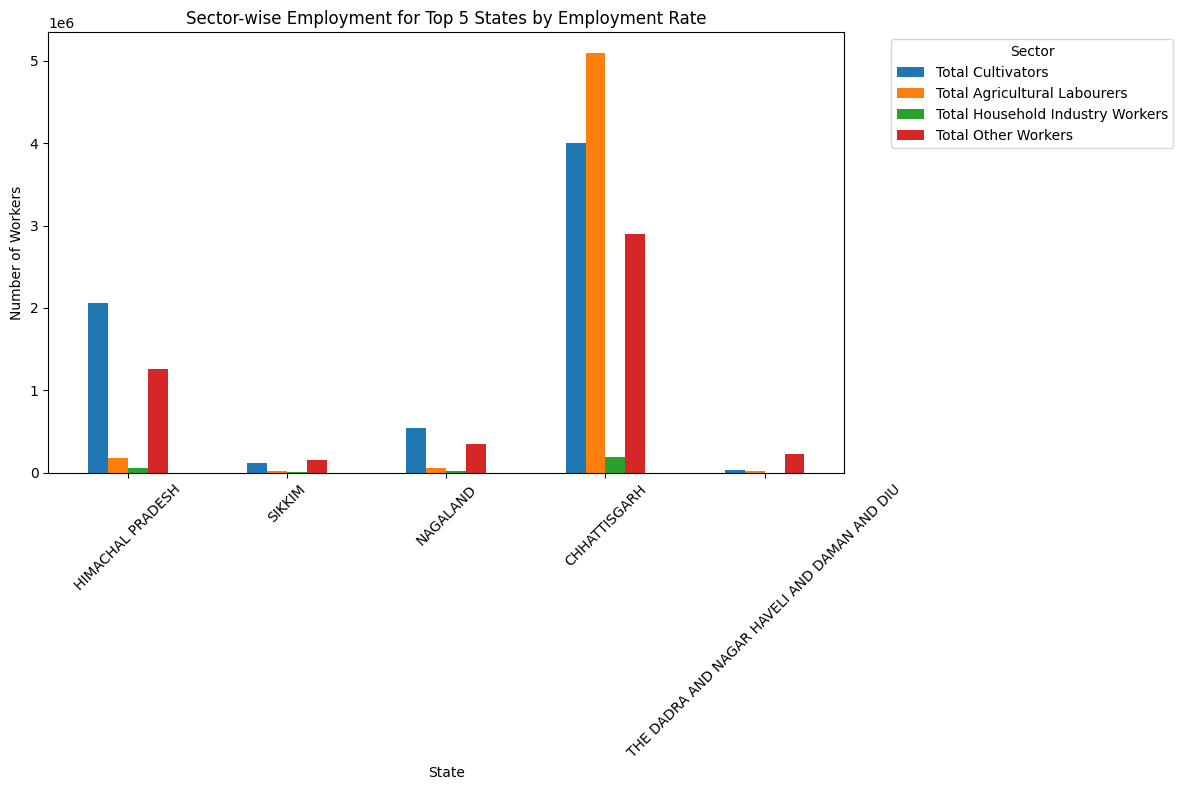

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('NDAP_REPORT_6000.csv')
df['Total Working Population'] = df['Working population']
df['Employment Rate'] = (df['Total Working Population'] / df['Population']) * 100

statewise_data = df.groupby('State').sum()
statewise_data['Employment Rate'] = (statewise_data['Working population'] / statewise_data['Population']) * 100

top_5_states = statewise_data.sort_values(by='Employment Rate', ascending=False).head(5)

top_5_states['Total Cultivators'] = top_5_states['Number of male main workers as cultivators'] + \
                                    top_5_states['Number of female main workers as cultivators'] + \
                                    top_5_states['Number of male marginal workers as cultivators'] + \
                                    top_5_states['Number of female marginal workers as cultivators']

top_5_states['Total Agricultural Labourers'] = top_5_states['Number of male main workers as agricultural labourers'] + \
                                               top_5_states['Number of female main workers as agricultural labourers'] + \
                                               top_5_states['Number of male marginal workers as agricultural labourers'] + \
                                               top_5_states['Number of female marginal workers as agricultural labourers']

top_5_states['Total Household Industry Workers'] = top_5_states['Number of male main workers in the household industry'] + \
                                                   top_5_states['Number of female main workers in the household industry'] + \
                                                   top_5_states['Number of male marginal workers in the household industry'] + \
                                                   top_5_states['Number of female marginal workers in the household industry']

top_5_states['Total Other Workers'] = top_5_states['Number of male main workers as Other workers'] + \
                                      top_5_states['Number of female main workers as Other workers'] + \
                                      top_5_states['Number of male marginal workers as Other workers'] + \
                                      top_5_states['Number of female marginal workers as Other workers']

plot_data = top_5_states[['Total Cultivators', 'Total Agricultural Labourers',
                          'Total Household Industry Workers', 'Total Other Workers']]

plot_data.plot(kind='bar', figsize=(12, 8))

plt.title('Sector-wise Employment for Top 5 States by Employment Rate')
plt.xlabel('State')
plt.ylabel('Number of Workers')
plt.xticks(rotation=45)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Check if there are any missing values